This notebook tests the integration methods for calculating interaction rates depending on grid size

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Photon fields

In [3]:
%%time

from prince_cr import photonfields
ph_CMB = photonfields.CMBPhotonSpectrum()
ph_CIB = photonfields.CIBFranceschini2D()
ph_CIB_simple = photonfields.CIBFranceschini2D(simple_scaling=True)
ph_combined = photonfields.CombinedPhotonField([photonfields.CMBPhotonSpectrum,photonfields.CIBFranceschini2D])

ph_field = ph_CMB.get_photon_density

Wall time: 506 ms


# Interaction rate reference test

In [5]:
from prince_cr import cross_sections
from prince_cr.data import EnergyGrid

cross_sec = cross_sections.CompositeCrossSection(
    [(0., cross_sections.TabulatedCrossSection, ('CRP2_TALYS',)),
     (0.14, cross_sections.SophiaSuperposition, ())])

nonel_intp = cross_sec.resp.nonel_intp[101]
incl_intp = cross_sec.resp.incl_diff_intp[(101,101)]

CompositeCrossSection::_join_models(): Attempt to join 2 models.


# Analyze interaction rate as a function of bins per decade

In [6]:
numbers = [8,16,32,256]#,256,1024]
cr_energy_grids = [EnergyGrid(5, 14, bin_dec).grid for bin_dec in numbers]
ph_energy_grids = [EnergyGrid(-15, -6, bin_dec).grid for bin_dec in numbers]

cr_energy_bins = [EnergyGrid(5, 14, bin_dec).bins for bin_dec in numbers]
ph_energy_bins = [EnergyGrid(-15, -6, bin_dec).bins for bin_dec in numbers]

cr_energy_widths = [EnergyGrid(5, 14, bin_dec).widths for bin_dec in numbers]
ph_energy_widths = [EnergyGrid(-15, -6, bin_dec).widths for bin_dec in numbers]

labels = [str(num)+' bins per dec' for num in numbers]

## Check response function f(y) grid dependence

In [7]:
cr_energy = 1e10

resp_list = []
resp_list_upscale = []

grid_max = ph_energy_grids[-1]
ygrid_max = ph_energy_grids[-1] * cr_energy
for grid in ph_energy_grids:
    ygrid = cr_energy * grid # to ygrid by multiplying with Ecr

    function = nonel_intp(ygrid)
    resp_list.append((grid, function))

    function = np.interp(ygrid_max, ygrid, function)
    resp_list_upscale.append((grid_max, function))

C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


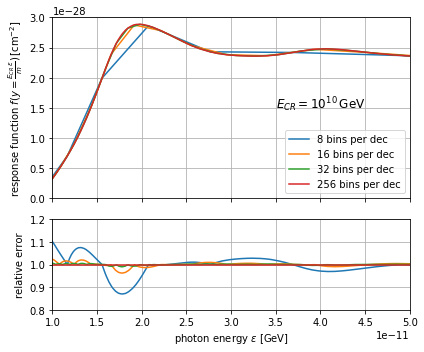

In [8]:
f, (ax1, ax2) = plt.subplots(2, figsize = (6,5), sharex=True,
                             gridspec_kw = {'height_ratios':[2, 1]})

plt.sca(ax1)
# plot
for (egrid, func), label in zip(resp_list,labels):
    plt.plot(egrid,func, label = label)
plt.xlim(1e-11,5e-11)
plt.ylim(0,3e-28)
plt.text(3.5e-11, 1.5e-28, r'$E_{CR} = 10^{10} \, \mathrm{GeV}$', fontsize='large')
plt.legend()
plt.ylabel(r'response function $f(y = \frac{E_{CR} \, \epsilon}{m}) \, [\mathrm{cm}^{-2}]$')
plt.grid()

plt.sca(ax2)
_,func_scale = resp_list_upscale[-1]
for egrid, func in resp_list_upscale:
    ax2.plot(egrid,func/func_scale)
plt.xlim(1e-11,5e-11)
plt.ylim(0.8,1.2)
plt.xlabel(r'photon energy $\epsilon$ [GeV]')
plt.ylabel(r'relative error')
plt.grid()

f.subplots_adjust(hspace=0.)
plt.tight_layout()
plt.show()

# Check photon field dependence on photon grid

In [9]:
# plotting f_function
cr_energy = 1e10

ph_field_list = []
ph_field_upscale = []

grid_max = ph_energy_grids[-1]
for grid in ph_energy_grids:
    function = ph_field(grid, 0.)
    ph_field_list.append((grid, function))

    function = np.interp(grid_max, grid, function)
    ph_field_upscale.append((grid_max, function))

C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


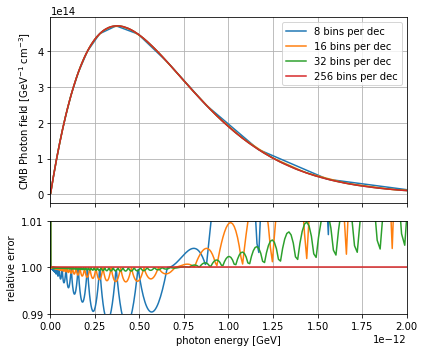

In [12]:
f, (ax1, ax2) = plt.subplots(2, figsize = (6,5), sharex=True,
                             gridspec_kw = {'height_ratios':[2, 1]})

plt.sca(ax1)
for (egrid, func), label in zip(ph_field_list,labels):
    plt.plot(egrid,func, label = label)
plt.xlim(0,2e-12)
# ax1.ylim(0,4e-28)
plt.legend()
# ax1.tick_params(top='on',labeltop='on')
plt.ylabel(r'CMB Photon field [GeV$^{-1}$ cm$^{-3}$]')
plt.grid()

plt.sca(ax2)
_, func_scale = ph_field_upscale[-1]
for egrid, func in ph_field_upscale:
    plt.plot(egrid,func/func_scale)
plt.xlim(0,2e-12)
plt.ylim(0.99,1.01)
plt.xlabel(r'photon energy [GeV]')
plt.ylabel(r'relative error')
plt.grid()

f.subplots_adjust(hspace=0.)
plt.tight_layout()
plt.show()

f.set_size_inches(6,6)
# f.savefig('CMB_grid_dependence.png', dpi=200)

# Check the grid dependence of the product: Response $f(y) \times$ Photonfield

In [13]:
# plotting f_function
cr_energy = 5e11

resp_list = []
resp_list_upscale = []

grid_max = ph_energy_grids[-1]
ygrid_max = ph_energy_grids[-1] * cr_energy
for grid in ph_energy_grids:
    ygrid = cr_energy * grid # to ygrid by multiplying with Ecr

    function = nonel_intp(ygrid)
    resp_list.append((grid, function))

    function = np.interp(ygrid_max, ygrid, function)
    resp_list_upscale.append((grid_max, function))
    
    
# plotting f_function
ph_field_list = []
ph_field_upscale = []

grid_max = ph_energy_grids[-1]
for grid in ph_energy_grids:
    function = ph_field(grid, 0.)
    ph_field_list.append((grid, function))

    function = np.interp(grid_max, grid, function)
    ph_field_upscale.append((grid_max, function))


# plotting f_function
fold_func = []
fold_func_upscale = []

grid_max = ph_energy_grids[-1]
ygrid_max = ph_energy_grids[-1] * cr_energy
for grid in ph_energy_grids:
    ygrid = cr_energy * grid # to ygrid by multiplying with Ecr

    function = nonel_intp(ygrid) * ph_field(grid, 0.)
    fold_func.append((grid, function))

    function = np.interp(grid_max, grid, function)
    fold_func_upscale.append((grid_max, function))

C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


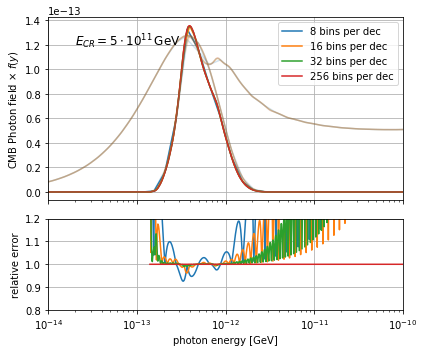

In [14]:
f, (ax1, ax2) = plt.subplots(2, figsize = (6,5), sharex=True,
                             gridspec_kw = {'height_ratios':[2, 1]})

plt.sca(ax1)
for (egrid, func), label in zip(fold_func,labels):
    plt.plot(egrid,func, label = label,)

_, arr = fold_func[-1]
rel_scale = np.max(arr) / 4

plt.gca().set_prop_cycle(None)
rescale = 8e-15 * rel_scale
# rescale = 8e-22
for (egrid, func), label in zip(ph_field_list,labels):
    plt.semilogx(egrid,rescale * func, alpha = 0.2)

plt.gca().set_prop_cycle(None)
rescale = 1.3e28 * rel_scale
# rescale = 1 / rescale
for (egrid, func), label in zip(resp_list,labels):
    plt.semilogx(egrid,rescale * func, alpha = 0.2)

plt.xlim(1e-14,1e-10)
# ax1.ylim(0,4e-28)
plt.legend()
# ax1.tick_params(top='on',labeltop='on')
plt.ylabel(r'CMB Photon field $\times$ $f(y)$ ')
plt.grid()
plt.text(2e-14, 1.2e-13, r'$E_{CR} = 5 \cdot 10^{11} \, \mathrm{GeV}$', fontsize='large')

plt.sca(ax2)
_, func_scale = fold_func_upscale[-1]
for egrid, func in fold_func_upscale:
    plt.semilogx(egrid,func/func_scale)
plt.xlim(1e-14,1e-10)
plt.ylim(0.8,1.2)
plt.xlabel(r'photon energy [GeV]')
plt.ylabel(r'relative error')
plt.grid()

f.subplots_adjust(hspace=0.)
plt.tight_layout()
plt.show()

# Check the precision of the interaction rate depending on grids

The interaction rate is the integral of the product Response $f(y) \times$ Photonfield in each cosmic ray energy bin

## 1st: Step integration

In [15]:
# getting intrates
int_rate = []
int_rate_upscale = []

cr_grid = cr_energy_grids[3]
for ph_grid, ph_width, in zip(ph_energy_grids, ph_energy_widths):
    ph_mesh, cr_mesh = np.meshgrid(ph_grid, cr_grid, indexing='ij')
    y_mesh = ph_mesh * cr_mesh

    function = nonel_intp(y_mesh)
#     for idx in range(y_mesh.shape[0]):
#         function[idx,:] -= incl_intp(1.,y_mesh[idx,:],grid = True)[0]
    function *= ph_field(ph_mesh, 0.)
    rate = function * ph_width[:,np.newaxis]
    rate = np.sum(rate, axis = 0)
    
    int_rate.append((cr_grid,rate))

C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


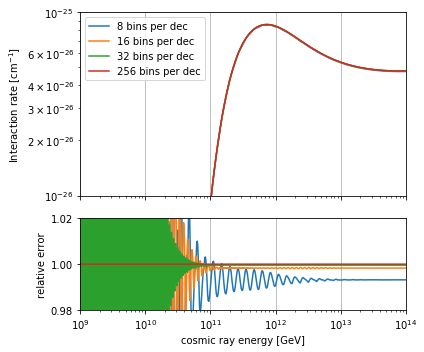

In [16]:
# plot also weighted by cr_widths

f, (ax1, ax2) = plt.subplots(2, figsize = (6,5), sharex=True,
                             gridspec_kw = {'height_ratios':[2, 1]})

plt.sca(ax1)
for (ecrgrid, func), label in zip(int_rate,labels):
    plt.loglog(ecrgrid, func, label = label)

plt.xlim(1e9,1e14)
plt.ylim(1e-26,1e-25)
# plt.ylim(1e-25,1e-24)

plt.legend()
# ax1.tick_params(top='on',labeltop='on')
plt.ylabel(r'Interaction rate [$\mathrm{cm}^{-1}$]')
plt.grid()

plt.sca(ax2)
_, func_scale = int_rate[-1]
for ecrgrid, func in int_rate:
    plt.semilogx(ecrgrid,func/func_scale)
plt.xlim(1e9,1e14)
plt.ylim(0.98,1.02)
plt.xlabel(r'cosmic ray energy [GeV]')
plt.ylabel(r'relative error')
plt.grid()

f.subplots_adjust(hspace=0.)
plt.tight_layout()
plt.show()

f.set_size_inches(6,6)

## 2nd: tapz integration

In [17]:
# getting intrates
int_rate = []
int_rate_upscale = []

cr_grid = cr_energy_grids[3]
for ph_bins in ph_energy_bins:
    ph_mesh, cr_mesh = np.meshgrid(ph_bins, cr_grid, indexing='ij')
    y_mesh = ph_mesh * cr_mesh

    function = nonel_intp(y_mesh) * ph_field(ph_mesh, 0.)
#     for idx in range(y_mesh.shape[0]):
#         function[idx,:] -= incl_intp(1.,y_mesh[idx,:],grid = True)[0]
    rate = np.trapz(function,x = ph_bins, axis = 0)
    
    int_rate.append((cr_grid,rate))

C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
C:\Users\afedy\Miniconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


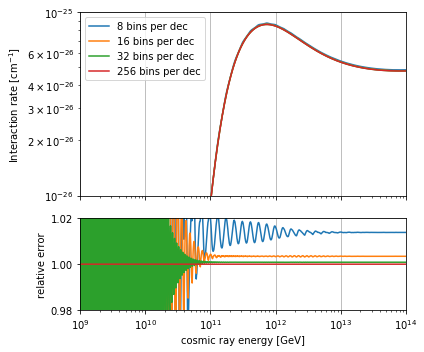

In [18]:
f, (ax1, ax2) = plt.subplots(2, figsize = (6,5), sharex=True,
                             gridspec_kw = {'height_ratios':[2, 1]})

plt.sca(ax1)
for (ecrgrid, func), label in zip(int_rate,labels):
    plt.loglog(ecrgrid, func, label = label)

plt.xlim(1e9,1e14)
plt.ylim(1e-26,1e-25)

plt.legend()
# ax1.tick_params(top='on',labeltop='on')
plt.ylabel(r'Interaction rate [$\mathrm{cm}^{-1}$]')
plt.grid()

plt.sca(ax2)
_, func_scale = int_rate[-1]
for ecrgrid, func in int_rate:
    plt.semilogx(ecrgrid,func/func_scale)
plt.xlim(1e9,1e14)
plt.ylim(0.98,1.02)
plt.xlabel(r'cosmic ray energy [GeV]')
plt.ylabel(r'relative error')
plt.grid()

f.subplots_adjust(hspace=0.)
plt.tight_layout()
plt.show()

f.set_size_inches(6,6)